# Eploratory Data analytics - Diabetes

---------------
## Context
---------------

Diabetes is one of the most frequent diseases worldwide and the number of diabetic patients are growing over the years. The main cause of diabetes remains unknown, yet scientists believe that both genetic factors and environmental lifestyle play a major role in diabetes.

A few years ago research was done on a tribe in America which is called the Pima tribe (also known as the Pima Indians). In this tribe, it was found that the ladies are prone to diabetes very early. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients were females at least 21 years old of Pima Indian heritage. 

-----------------
## Objective
-----------------

The objective of this project is to classify whether an individual has diabetes or not.

The Pima Dataset consists of several Medical Variables(Independent) and one Outcome Variable(Dependent)
- The independent variables in this data set are :-'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'
- The dependent variable is the outcome variable value is either 1 or 0 indicating whether a person has diabetes(1) or not(0).

-------------------------
## Data Dictionary
-------------------------

The dataset has the following information:

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: A function that scores the likelihood of diabetes based on family history.
* Age: Age in years
* Outcome: Class variable (0: a person is not diabetic or 1: a person is diabetic)

## Import the necessary libraries 

In [1]:
import numpy as np 
import pandas as pd

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree


# For tuning the model
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt #Matplotlib 
%matplotlib inline

# Numpy is a library that is used for mathematical computations and working with arrays
# Matplotlib is a library that is used to create interactive visualizations

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Read the given dataset

In [2]:
pima = pd.read_csv("diabetes.csv")

In [3]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,79,33.6,0.627,50,1
1,1,85,66,29,79,26.6,0.351,31,0
2,8,183,64,20,79,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#dimension of the pima dataframe
pima.shape

(768, 9)

In [5]:
#The data types of all the variables in the data set
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Missing values 

In [6]:
#missing values in the pima dataframe
pima.isnull().values.any()

False

In [7]:
pima.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# Let's check for missing values in the data
round(pima.isnull().sum() / pima.isnull().count() * 100, 2)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

## Summary statistics of the dataset

In [9]:
# Checking summary statistics
pima.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.675781,30.436252,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.250000,12.117203,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,26.447917,9.733872,7.000,20.00000,23.0000,32.00000,99.00
Insulin,768.0,118.270833,93.243829,14.000,79.00000,79.0000,127.25000,846.00
BMI,768.0,32.450805,6.875374,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


- count tells us the number of NoN-empty rows in a feature.
- mean tells us the mean value of that feature.
- std tells us the Standard Deviation Value of that feature.
- min tells us the minimum value of that feature.
- 25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
- max tells us the maximum value of that feature.

**Observations**

- There 786 pregnancies with an average of four pregnancies per female.
- The highest number of pregnancies recorded for a woman was 17 and the lowest was 0. 
- A majority of the pregnancies lie between one and six. The standard deviation is slightly lower than the mean meaning that the data is clustered around the mean. 

In [10]:
#check for unique values to check for which columns to drop
pima.nunique()

Pregnancies                  17
Glucose                     135
BloodPressure                47
SkinThickness                50
Insulin                     185
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

# Exploratory Data Analysis

#### Univariate Analysis

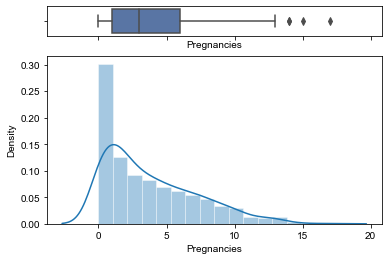

In [11]:
# 1. Pregnacies

# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.set(style="darkgrid")

# Add a graph in each part
sns.boxplot(pima["Pregnancies"], ax=ax_box)
sns.distplot(pima["Pregnancies"], ax=ax_hist)
ax_box.set(xlabel='Pregnancies')
plt.show()

**Observations:**

- The distribution of Customer_Age is skewed to the right.
- Most women have one child and very few women have more than 10 and 15 children.
- From the boxplot, we can see that there are a few outliers.

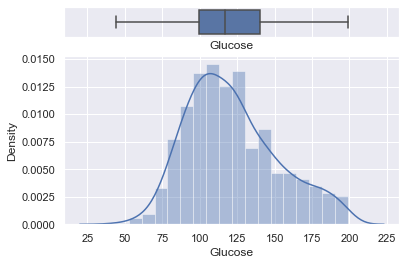

In [12]:
# 2. Glucose

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(pima["Glucose"], ax=ax_box)
sns.distplot(pima["Glucose"], ax=ax_hist)
ax_box.set(xlabel='Glucose')
plt.show()

**Observations**

- The distribution of Glucose is normally distributed with mean of 122 and median at 117.

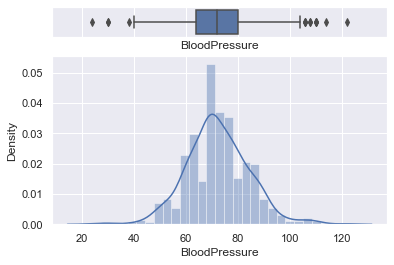

In [13]:
# 3. BloodPressure

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(pima["BloodPressure"], ax=ax_box)
sns.distplot(pima["BloodPressure"], ax=ax_hist)
ax_box.set(xlabel='BloodPressure')
plt.show()

**Observations**

- The distribution is normal with high number of women having BloodPressure at 69
- I can observe that there are outliers

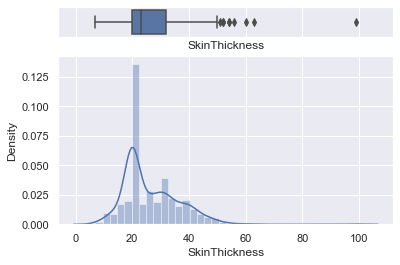

In [14]:
# 4. SkinThickness

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(pima["SkinThickness"], ax=ax_box)
sns.distplot(pima["SkinThickness"], ax=ax_hist)
ax_box.set(xlabel='SkinThickness')
plt.show()

**Observations**

- The distribution of the SkinThickness column is right-skewed.
- Many women have a skin thickness of 26

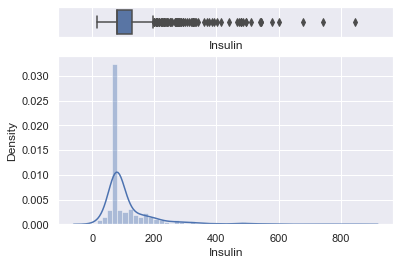

In [15]:
# 5. Insulin

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(pima["Insulin"], ax=ax_box)
sns.distplot(pima["Insulin"], ax=ax_hist)
ax_box.set(xlabel='Insulin')
plt.show()

**Observations**

- There are many outliers, insulin more than 200 are considered as outliers
- Most insulin rates are at 79

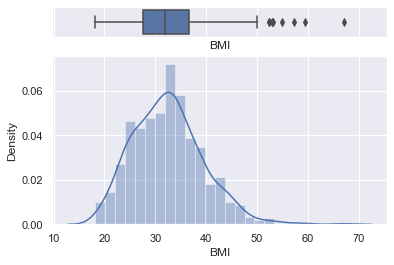

In [16]:
# 6. BMI

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(pima["BMI"], ax=ax_box)
sns.distplot(pima["BMI"], ax=ax_hist)
ax_box.set(xlabel='BMI')
plt.show()

**Observations**

- There are outliers from 50 BMI
- The distribution looks somewhat of a normal distribution 

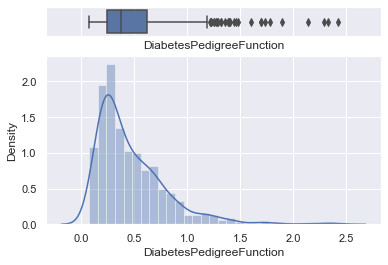

In [17]:
# 7. DiabetesPedigreeFunction

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(pima["DiabetesPedigreeFunction"], ax=ax_box)
sns.distplot(pima["DiabetesPedigreeFunction"], ax=ax_hist)
ax_box.set(xlabel='DiabetesPedigreeFunction')
plt.show()

**Observations**

- The distribution of the DiabetesPedigreeFunction column is skewed towards the right

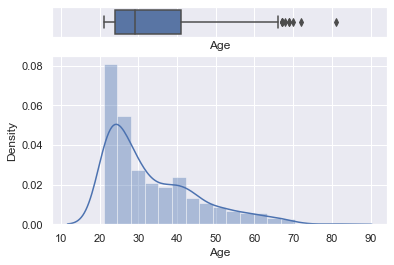

In [18]:
# 8. Age

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(pima["Age"], ax=ax_box)
sns.distplot(pima["Age"], ax=ax_hist)
ax_box.set(xlabel='Age')
plt.show()

**Observations**

- The Age column is skewed towards the right
- Many women fall under the 20-30 years age bracket

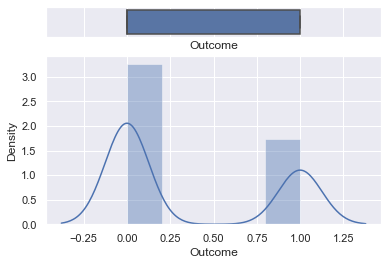

In [19]:
# 9. Outcome

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(pima["Outcome"], ax=ax_box)
sns.distplot(pima["Outcome"], ax=ax_hist)
ax_box.set(xlabel='Outcome')
plt.show()

<AxesSubplot:>

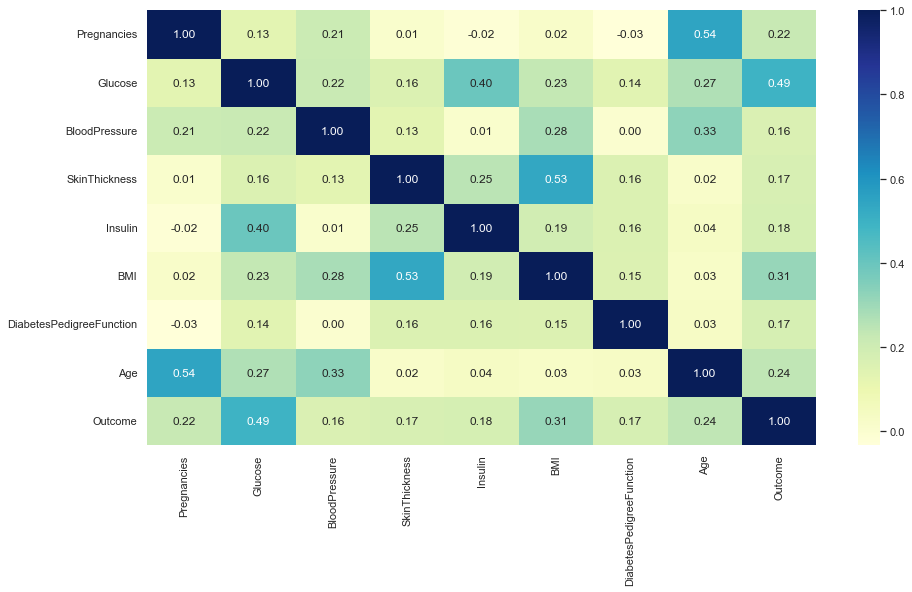

In [20]:
# Plotting the correlation
plt.figure(figsize=(15,8))
sns.heatmap(pima.corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

**Observations**

- There is a strong positive correlation between age and pregnancies
- There is also a positive relationship between Insulin and glucose
- There is a negative correlation between DiabetesPedigreeFunction and Pregnancies

### Outcome vs Pregnancies

Text(0, 0.5, 'Percentage Outcome %')

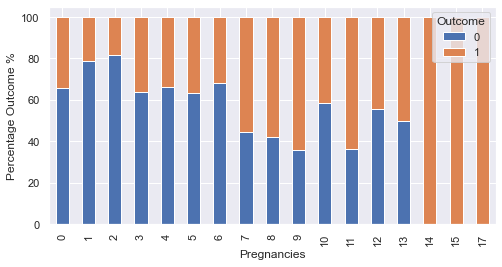

In [21]:
(pd.crosstab(pima['Pregnancies'],pima['Outcome'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Outcome %')

### Outcome vs BloodPressure

Text(0, 0.5, 'Percentage Outcome %')

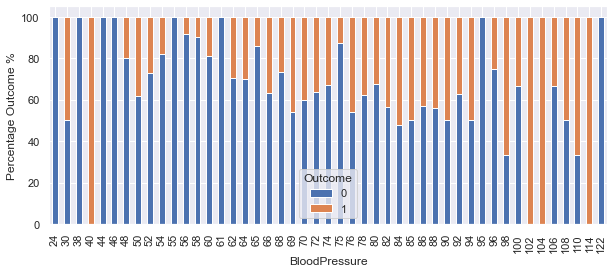

In [22]:
(pd.crosstab(pima['BloodPressure'],pima['Outcome'],normalize='index')*100).plot(kind='bar',figsize=(10,4),stacked=True)
plt.ylabel('Percentage Outcome %')

### Outcome vs SkinThickness

Text(0, 0.5, 'Percentage Outcome %')

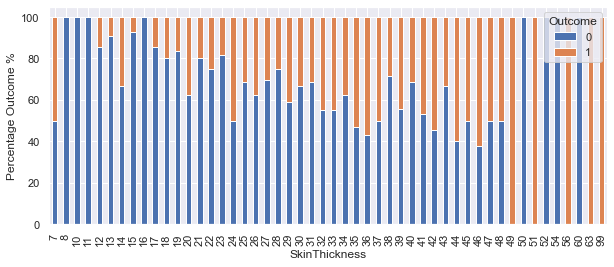

In [23]:
(pd.crosstab(pima['SkinThickness'],pima['Outcome'],normalize='index')*100).plot(kind='bar',figsize=(10,4),stacked=True)
plt.ylabel('Percentage Outcome %')

### Outcome vs Age

Text(0, 0.5, 'Percentage Outcome %')

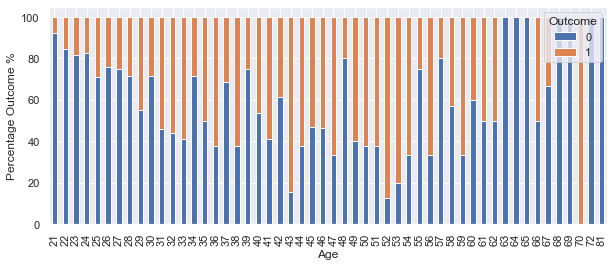

In [24]:
(pd.crosstab(pima['Age'],pima['Outcome'],normalize='index')*100).plot(kind='bar',figsize=(10,4),stacked=True)
plt.ylabel('Percentage Outcome %')

In [25]:
# Let's check the relationship between Outcome and the other variables
pima.groupby(['Outcome']).mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.700000,70.80600,25.224000,106.080000,30.880066,0.429734,31.190000
1,4.865672,142.152985,74.94403,28.731343,141.014925,35.381288,0.550500,37.067164


**Observations**
- Women with blood pressure 71 are likely to get diabetes
- Women with glucose 141 are highly likely to get diabetes with the mean age of 37

# Model Building - Approach

- Data preparation.
- Partition the data into a train and test set.
- Build a model on the train data.
- Tune the model if required.
- Test the data on the test set.

### Data preparation

**Separating the independent variables (X) and the dependent variable (Y)**

In [26]:
# Separating target variable and other variables

Y= pima.Outcome
X= pima.drop(columns = ['Outcome'])

**Splitting the data into 70% train and 30% test set**

Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use the ***stratified sampling*** technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.

In [27]:
# Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

# Scaling the data 

The independent variables in this dataset have different scales. When features have different scales from each other, there is a chance that a higher weightage will be given to features that have a higher magnitude, and they will dominate over other features whose magnitude changes may be smaller but whose percentage changes may be just as significant or even larger. This will impact the performance of the machine learning algorithm, and I do not want the algorithm to be biased towards one feature.

The solution to this issue is ***Feature Scaling***, i.e. scaling the dataset so as to give every transformed variable a comparable scale.

Tree based models such as ***Decision Trees*** and ***Random Forest*** do not require feature scaling to be performed as they are not sensitive to the variance in the data.

I will scale the data for ***Logistic Regression*** and ***SVM***. I will use the ***Standard Scaler*** method, which centers and scales the dataset using Z-Score. It standardizes features by subtracting the mean and scaling it to have unit variance. The standard score of sample x is calculated as:

$z = (x - u) / s$

where **u** is the mean of the training samples (zero) and s is the standard deviation of the training samples.

In [28]:
# Scaling the data
sc=StandardScaler()

# Fit_transform on train data
X_train_scaled=sc.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X.columns)

# Transform on test data
X_test_scaled=sc.transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X.columns)

In [29]:
X_train_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.344659,-0.424974,-0.828664,1.489184,0.135398,0.510495,0.097264,-0.702400
1,-0.839866,-0.814357,-0.146683,1.386659,-0.450017,0.854184,-0.781112,-0.277542
2,1.233054,-0.717011,0.194307,1.386659,1.142310,1.048443,0.533484,0.827089
3,-1.135998,-0.749459,-0.231931,-0.663832,-0.450017,-1.103348,-0.677250,-0.957315
4,-0.839866,0.256446,-0.146683,-1.381505,-0.145601,-0.968861,-0.027370,-0.957315


In [30]:
X_test_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1.135998,0.288895,-0.487674,1.386659,-0.450017,0.286350,-0.846397,-0.957315
1,-1.135998,1.392147,1.558269,0.668987,6.586664,2.976090,-0.160907,-0.872344
2,0.936922,-0.652114,0.194307,1.386659,-0.145601,0.719697,-0.822657,0.997032
3,-0.839866,-0.944151,-1.340150,-1.586554,-0.450017,-1.476923,-0.190582,-0.957315
4,0.640791,-0.262731,1.387774,-0.663832,-0.450017,-0.684945,-0.695055,2.781436


# Model evaluation criterion

**The model can make two types of wrong predictions:**

Predicting a woman will get diabetes when the woman does not get diabetes
Predicting a woman  will not get diabetes when the woman actually gets diabetes

**Which case is more important?**

**Predicting a woman will not get diabetes when the woman actually gets diabetes**, i.e., It can be fatal if a woman gets misdiagnosed and hence the more important case of wrong predictions.

**How to reduce this loss i.e the need to reduce False Negatives?**

**I would want the Recall to be maximized**, the greater the Recall, the higher the chances of minimizing false negatives. Hence, the focus should be on increasing the Recall (minimizing the false negatives) or, in other words, identifying the true positives (i.e. Class 1) very well, so as to diagnose diabetes accuratley.

### Note Better

***I will create a function to calculate and print the classification report and confusion matrix so that I don't have to rewrite the same code repeatedly for each model.***

In [31]:
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Non-diabetic', 'Diabetic'], yticklabels=['Non-diabetic', 'Diabetic'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Building the model

**I will be building 4 different models:**

- Logistic Regression
- Support Vector Machine(SVM)
- Decision Tree
- Random Forest

# Model 1: Logistic Regression

Logistic Regression is a supervised learning algorithm which is used for ***binary classification problems*** i.e. where the dependent variable is categorical and has only two possible values. In logistic regression, we use the sigmoid function to calculate the probability of an event y, given some features x as:

$P(y)=1/exp(1 + exp(-x))$

In [32]:
# Fitting logistic regression model

lg=LogisticRegression()
lg.fit(X_train_scaled,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       350
           1       0.73      0.59      0.65       187

    accuracy                           0.78       537
   macro avg       0.77      0.74      0.75       537
weighted avg       0.78      0.78      0.78       537



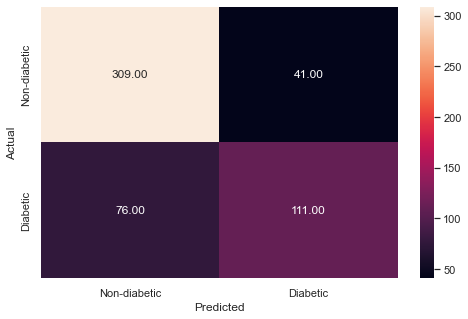

In [33]:
# Checking the performance on the training data
y_pred_train = lg.predict(X_train_scaled)

metrics_score(y_train, y_pred_train)

**Read the confusion matrix clockwise**

- True Negative (Actual=0, Predicted=0): Model predicts that a woman is non-diabetic and the woman is actually non-diabetic

- False Positive (Actual=0, Predicted=1): Model predicts that a woman is diabetic but the woman is non-diabetic

- False Negative (Actual=1, Predicted=0): Model predicts that a woman is non-diabetic but the woman is diabetic

- True Positive (Actual=1, Predicted=1): Model predicts that a woman is diabetic and the woman is actually diabetic

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       150
           1       0.70      0.52      0.60        81

    accuracy                           0.75       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.75      0.75      0.74       231



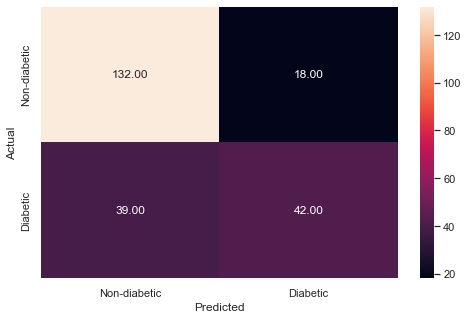

In [34]:
# Checking the performance on the test dataset
y_pred_test = lg.predict(X_test_scaled)

metrics_score(y_test, y_pred_test)

**Observations**

- I am getting an accuracy of 78% on train and 75% on test dataset.
- The recall for this model is 59% for class 1 on train and 52% on test.
- As the recall is slightly low, this model will not perform well in differentiating out those women who have a high chance of being diabetic.
- As we can see from the Confusion Matrix, this model fails to identify the majority of women who are at risk of diabetes.

**Let's check the coefficients and find which variables are leading to attrition and which can help to reduce the attrition**

In [35]:
# Printing the coefficients of logistic regression
cols=X.columns

coef_lg=lg.coef_

pd.DataFrame(coef_lg,columns=cols).T.sort_values(by = 0,ascending = False)

,0
Glucose,1.122860
BMI,0.657888
Pregnancies,0.477832
DiabetesPedigreeFunction,0.345254
Age,0.154723
Insulin,0.018862
SkinThickness,-0.051915
BloodPressure,-0.060992


**Observations**

Features which ***positively affect*** on the diabetis rate are:
- Glucose
- BMI
- Pregnancies
- DiabetesPedigreeFunction
- Age
- Insulin

Features which ***negatively affect*** on the diabetes rate are:
- SkinThickness
- BloodPressure

**Observations**

- Based on the Logistic Regression model, Glucose is the most important feature in detecting whether a woman would get diabetes or not.

- Other features which appear to affect the chances of being diabetic are BMI and number of pregnancies, both with positive correlations to diabetes likelihood.

- The Skin thickness feature is negatively correlated with diabetes signify that women are less likely to get diabetes with skin thickness. 

- The model also captures the inverse relation between BloodPressure and diabetes - suggesting if you have diabetes, you are twice as likely to have high blood pressure.

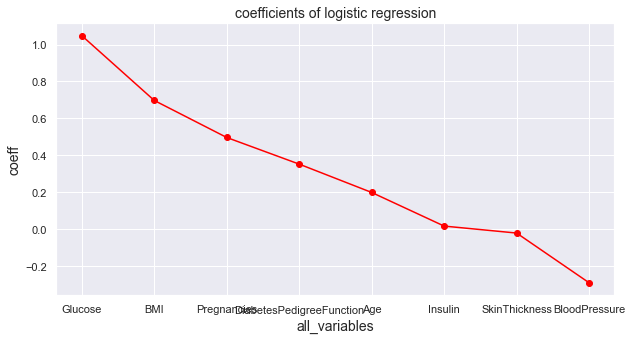

In [36]:
# let plot the graph

all_variables = ['Glucose','BMI','Pregnancies','DiabetesPedigreeFunction','Age','Insulin','SkinThickness','BloodPressure']
coeff = [1.048331,0.696948,0.496189,0.351727,0.198114,0.015799,-0.022016,-0.291502]

plt.figure(figsize=(10,5))
plt.plot(all_variables, coeff, color='red', marker='o')
plt.title('coefficients of logistic regression', fontsize=14)
plt.xlabel('all_variables', fontsize=14)
plt.ylabel('coeff', fontsize=14)
plt.grid(True)
plt.show()

**The coefficients of the logistic regression model give us the log of odds, which is hard to interpret in the real world. We can convert the log of odds into real odds by taking its exponential.**

In [37]:
# Finding the odds
odds = np.exp(lg.coef_[0]) 

# Adding the odds to a dataframe and sorting the values
pd.DataFrame(odds, X_train_scaled.columns, columns = ['odds']).sort_values(by ='odds', ascending = False) 

,odds
Glucose,3.073633
BMI,1.930710
Pregnancies,1.612575
DiabetesPedigreeFunction,1.412349
Age,1.167335
Insulin,1.019041
SkinThickness,0.949410
BloodPressure,0.940831


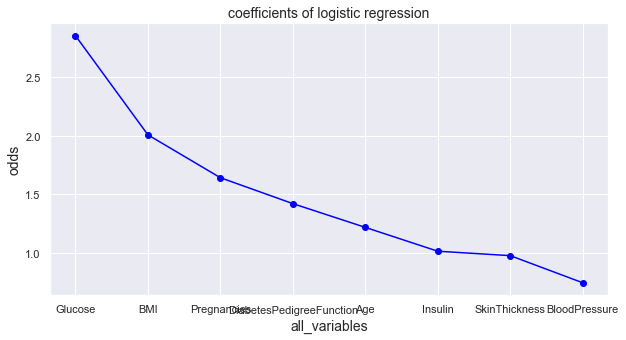

In [38]:
# lets plot the graph

all_variables = ['Glucose','BMI','Pregnancies','DiabetesPedigreeFunction','Age','Insulin','SkinThickness','BloodPressure']
coeff = [2.852885,2.007617,1.642451,1.421521,1.219102,1.015924,0.978225,0.747140]

plt.figure(figsize=(10,5))
plt.plot(all_variables, coeff, color='blue', marker='o')
plt.title('coefficients of logistic regression', fontsize=14)
plt.xlabel('all_variables', fontsize=14)
plt.ylabel('odds', fontsize=14)
plt.grid(True)
plt.show()

# Precision-Recall Curve for logistic regression

**Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.**

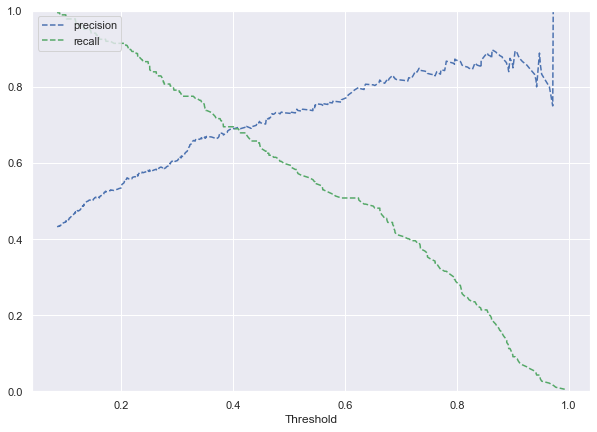

In [39]:
# Predict_proba gives the probability of each observation belonging to each class

y_scores_lg=lg.predict_proba(X_train_scaled)

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

**Observation:**

I can see that precision and recall are balanced for a threshold of about ~0.40.

Check this link later https://medium.com/analytics-vidhya/precision-recall-tradeoff-79e892d43134 
and this one https://github.com/amitupadhyay6/My-Python/blob/Classification/Classification/Precision%20Recall%20Tradeoff%20Binary%20Classifier.ipynb

In [40]:
# Calculating the exact threshold where precision and recall are equal.

for i in np.arange(len(thresholds_lg)):
    if precisions_lg[i]==recalls_lg[i]:
        print(thresholds_lg[i])

0.40136899017639954


**Let me find out the performance of the model at this threshold**

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       350
           1       0.69      0.70      0.69       187

    accuracy                           0.79       537
   macro avg       0.76      0.76      0.76       537
weighted avg       0.79      0.79      0.79       537



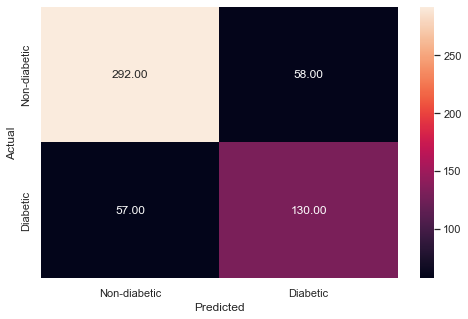

In [41]:
optimal_threshold=.40
y_pred_train = lg.predict_proba(X_train_scaled)

metrics_score(y_train, y_pred_train[:,1]>optimal_threshold)

**Observation**

The model performance has improved. The recall has increased significantly for class 1 to 70%.

**Let me check the performance on the test data.**

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       150
           1       0.65      0.63      0.64        81

    accuracy                           0.75       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



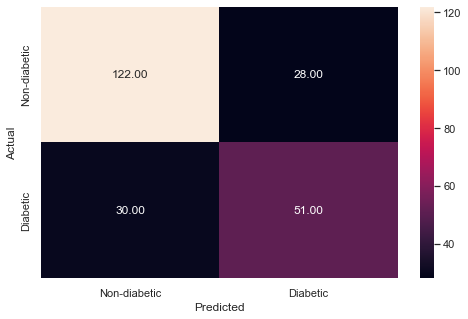

In [42]:
optimal_threshold=.40
y_pred_test = lg.predict_proba(X_test_scaled)

metrics_score(y_test, y_pred_test[:,1]>optimal_threshold)

**Observations:**
- Recall has increased significantly on test and train data and accuracy has increased too 
- The average recall and precision for the model are good but let's see if we can get better performance using other algorithms.

# Compare results 

**First Model**

| Recall4Train | Recall4Test | Accuracy4Train | Accuracy4Test|
| ------------: | -----------: | --------------: |-------------: |
| 0.59 | 0.52 | 78% | 75% |

**Optimized Model**

| Recall4Train | Recall4Test | Accuracy4Train | Accuracy4Test|
| ------------: | -----------: | --------------: |-------------: |
| 0.70 | 0.63 | 79% | 75% |

# Model 2: Support Vector Machines

The Support Vector Machine is a supervised learning algorithm mostly used for classification but it can be used also for regression. The main idea is that based on the labeled data (training data) the algorithm tries to find the optimal hyperplane which can be used to classify new data points. In two dimensions the hyperplane is a simple line.

## Utilise two of the most popular SVMs

1. Linear Kernel 
Linear Kernel is used when the data is Linearly separable, that is, it can be separated using a single Line. It is one of the most common kernels to be used. It is mostly used when there are a Large number of Features in a particular Data Set.

2. RBF Kernel
RBF kernels are the most generalized form of kernelization and is one of the most widely used kernels due to its similarity to the Gaussian distribution. The RBF kernel function for two points X₁ and X₂ computes the similarity or how close they are to each other. This kernel can be mathematically represented as follows:
${\displaystyle K(\mathbf {x} ,\mathbf {x'} )=\exp \left(-{\frac {\|\mathbf {x} -\mathbf {x'} \|^{2}}{2\sigma ^{2}}}\right)}$

**Linear Kernel**

In [43]:
# Fitting SVM
svm = SVC(kernel='linear') # Linear kernal or linear decision boundary
model = svm.fit(X= X_train_scaled, y = y_train)

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       350
           1       0.73      0.57      0.64       187

    accuracy                           0.78       537
   macro avg       0.76      0.73      0.74       537
weighted avg       0.77      0.78      0.77       537



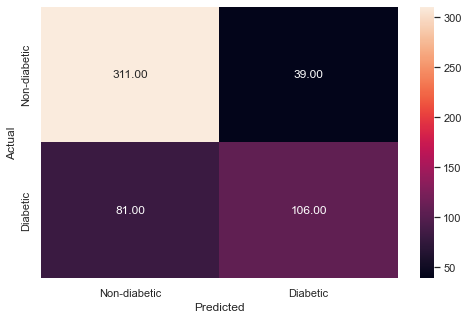

In [44]:
y_pred_train_svm = model.predict(X_train_scaled)

metrics_score(y_train, y_pred_train_svm)

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       150
           1       0.72      0.52      0.60        81

    accuracy                           0.76       231
   macro avg       0.75      0.71      0.72       231
weighted avg       0.76      0.76      0.75       231



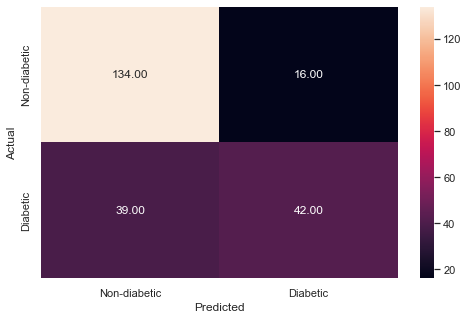

In [45]:
# Checking performance on the test data
y_pred_test_svm = model.predict(X_test_scaled)

metrics_score(y_test, y_pred_test_svm)

**Observations**

- We can see that accuracy is at 78% on train and 76% on test 
- Recall of class 1 for the model is only around 52% which implies our model will not correctly predict the women who are likely to be diabetic.

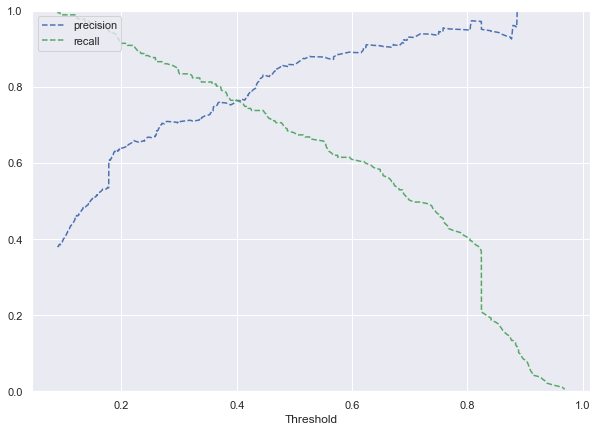

In [46]:
svm_rbf=SVC(kernel='rbf',probability=True)
svm_rbf.fit(X_train_scaled,y_train)
y_scores_svm=svm_rbf.predict_proba(X_train_scaled) # Predict_proba gives the probability of each observation belonging to each class


precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [47]:
# Calculating the exact threshold where precision and recall are equal.
for i in np.arange(len(thresholds_svm)):
    if precisions_svm[i]==recalls_svm[i]:
        print(thresholds_svm[i])

0.3991573213158128


              precision    recall  f1-score   support

           0       0.87      0.87      0.87       350
           1       0.76      0.76      0.76       187

    accuracy                           0.83       537
   macro avg       0.82      0.82      0.82       537
weighted avg       0.83      0.83      0.83       537



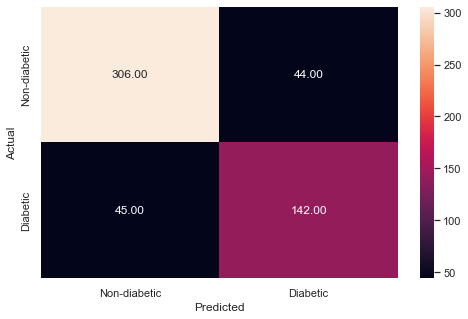

In [48]:
optimal_threshold1=0.40
y_pred_train = svm_rbf.predict_proba(X_train_scaled)

metrics_score(y_train, y_pred_train[:,1]>optimal_threshold1)

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       150
           1       0.62      0.58      0.60        81

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.70       231
weighted avg       0.72      0.73      0.73       231



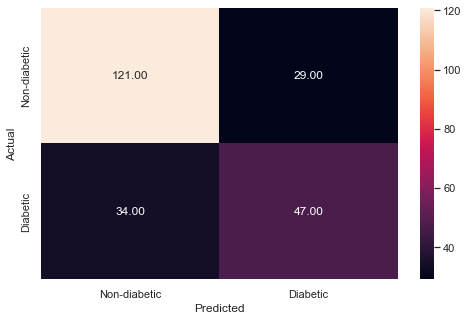

In [49]:
y_pred_test = svm_rbf.predict_proba(X_test_scaled)

metrics_score(y_test, y_pred_test[:,1]>optimal_threshold1)

**Observations**

- At the optimal threshold of .40, the model performance has improved significantly. The recall has improved from 0.52 to 0.76 which is more than 20% increase and the model is giving good generalized results.
- Moreover, the kernel used to create this is rbf, hence model is performing good with non-linear kernel.
- As the recall is good, this model will perform well in differentiating out those who have diabetes

**I have been able to build a predictive model, next time I will build a separate model with one that has decision trees and random forest so as to compare results. If there are any errors in the notebook, you can leave me a comment on Github or on Kaggle.**